In [2]:
from google.colab import drive
drive.mount('drive')

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
df = pd.read_csv("/content/drive/MyDrive/data.csv")

In [5]:
df.head()

,Unnamed: 0,Optimum Time quantum,Avg Arrival Time,Avg Burst Time,Total Completion Time,Number of processes
0,0,2,10.777778,13.000000,117,9
1,1,3,10.500000,12.500000,75,6
2,2,7,8.000000,16.200000,81,5
3,3,3,11.500000,7.500000,30,4
4,4,9,10.000000,15.333333,46,3


#EDA

In [6]:
lst=list(df.columns)
lst

['Unnamed: 0',
 'Optimum Time quantum',
 'Avg Arrival Time',
 'Avg Burst Time',
 'Total Completion Time',
 'Number of processes']

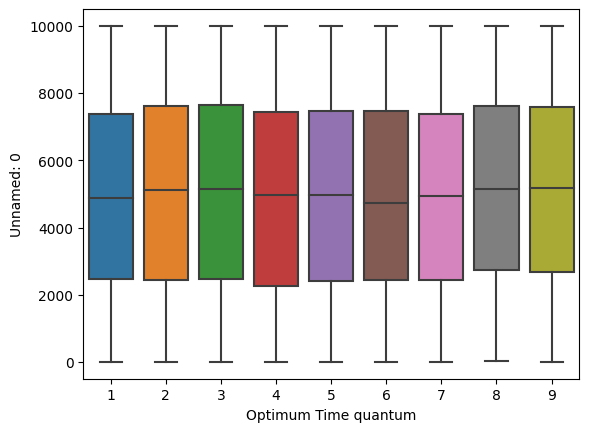

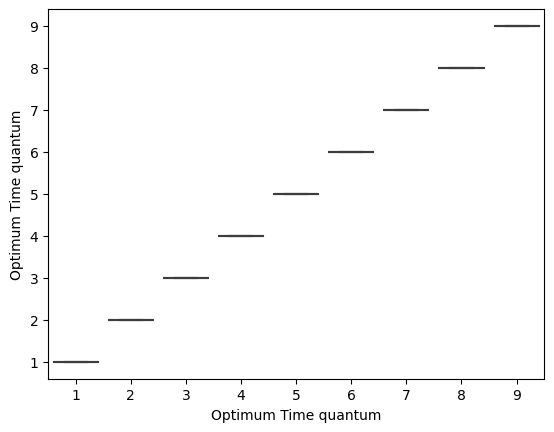

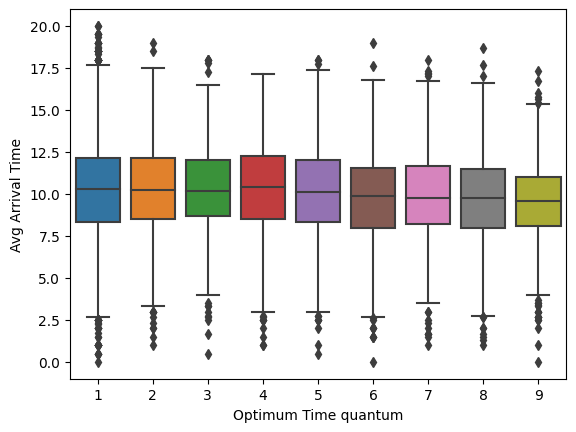

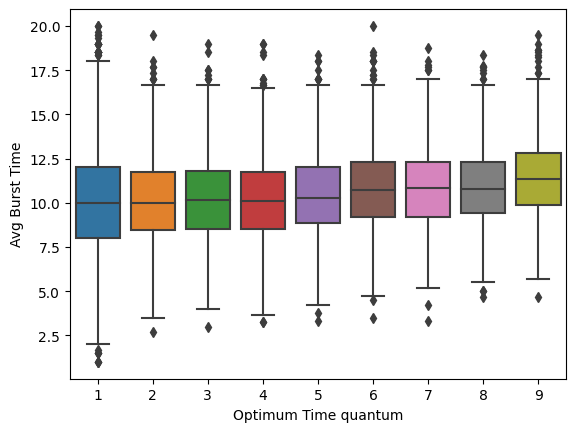

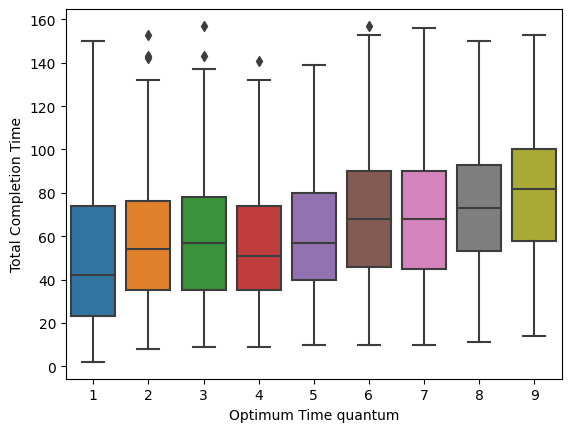

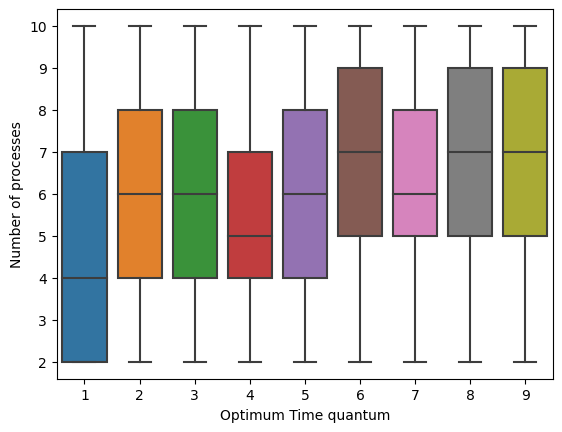

<Figure size 640x480 with 0 Axes>

In [7]:
for i in range(len(lst)):
  sns.boxplot(data = df, x = "Optimum Time quantum", y = lst[i])
  plt.figure()

#Standardisation

In [8]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [9]:
y = df["Optimum Time quantum"]
df = df.drop(["Optimum Time quantum", 'Unnamed: 0'], axis = "columns")

In [10]:
scaler.fit(df)
df = scaler.transform(df)
df

array([[ 0.28406632,  0.92757497,  1.76830312,  1.16800135],
       [ 0.18525617,  0.73994463,  0.39802375,  0.01206032],
       [-0.70403518,  2.12840916,  0.59377794, -0.37325336],
       ...,
       [ 0.36311444, -0.57346776, -1.16800983, -1.14388071],
       [-0.06374541, -0.27325922, -0.45024444, -0.37325336],
       [ 0.18525617, -0.38583742, -1.42901543, -1.52919439]])

In [11]:
df = pd.DataFrame(df,columns = lst[2:])
df

,Avg Arrival Time,Avg Burst Time,Total Completion Time,Number of processes
0,0.284066,0.927575,1.768303,1.168001
1,0.185256,0.739945,0.398024,0.012060
2,-0.704035,2.128409,0.593778,-0.373253
3,0.540973,-1.136359,-1.070133,-0.758567
4,0.007398,1.803183,-0.548122,-1.143881
...,...,...,...,...
9995,0.318650,0.927575,1.344169,0.782688
9996,0.955975,-0.323294,-0.156613,0.012060
9997,0.363114,-0.573468,-1.168010,-1.143881
9998,-0.063745,-0.273259,-0.450244,-0.373253


#KNN

In [12]:
X = df

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [14]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [15]:
pred = knn.predict(X_test)
pred

array([6, 3, 5, ..., 1, 3, 6])

In [16]:
from sklearn.metrics import classification_report,accuracy_score
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       0.39      0.41      0.40       809
           2       0.07      0.07      0.07       220
           3       0.10      0.10      0.10       201
           4       0.07      0.06      0.07       177
           5       0.08      0.09      0.08       232
           6       0.12      0.11      0.11       326
           7       0.09      0.10      0.10       263
           8       0.14      0.12      0.13       347
           9       0.19      0.20      0.20       425

    accuracy                           0.20      3000
   macro avg       0.14      0.14      0.14      3000
weighted avg       0.19      0.20      0.19      3000



In [17]:
np.round(accuracy_score(y_test,pred),3)

0.197

In [18]:
acc_test = []
acc_train = []
diff = []
K_value = []
for i in range(1, 200):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_train)
  pred_test = knn.predict(X_test)
  pred_train = knn.predict(X_train)
  acc_train.append(np.round(accuracy_score(y_train,pred_train),3))
  acc_test.append(np.round(accuracy_score(y_test,pred_test),3))
  diff.append(np.round(accuracy_score(y_train,pred_train),3) - (np.round(accuracy_score(y_test,pred_test),3)))
  K_value.append(i)

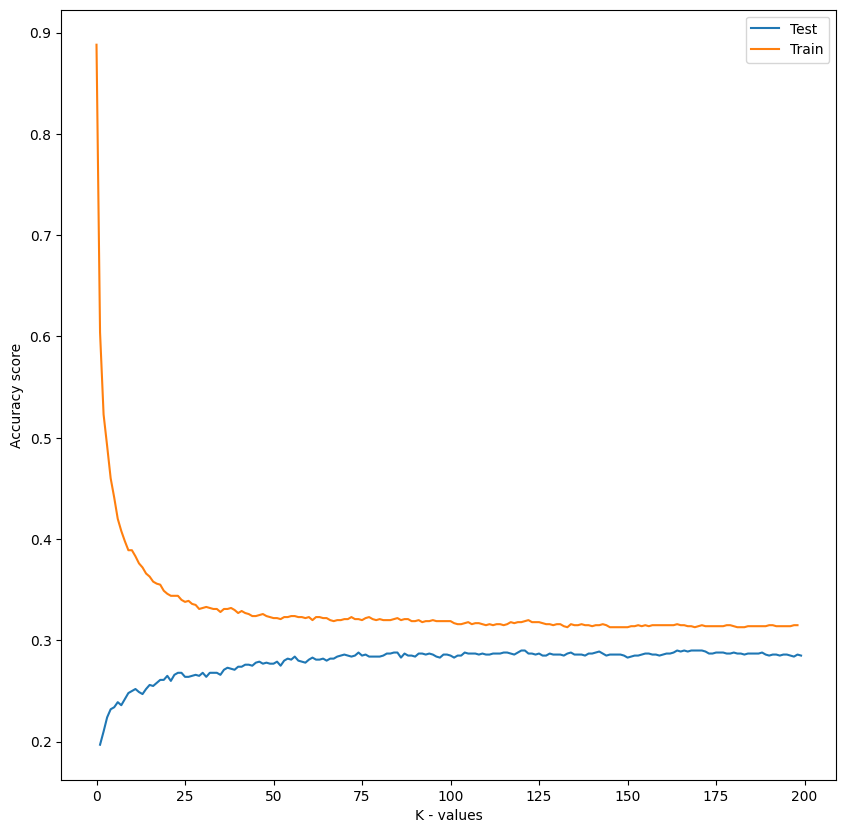

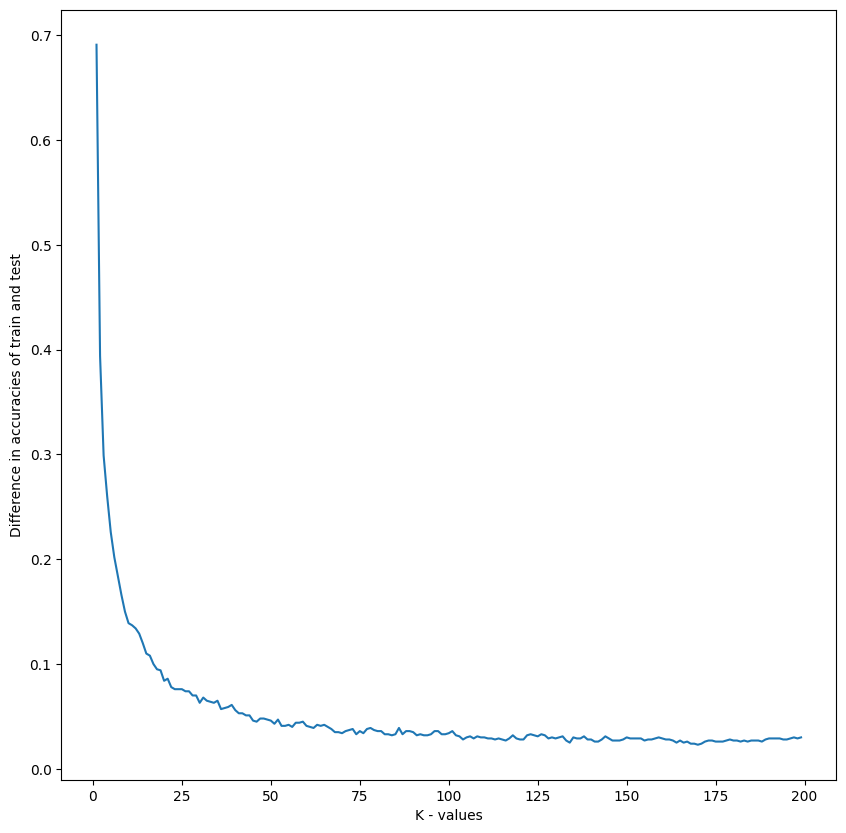

In [24]:
plt.figure(figsize = (10, 10))
plt.plot(K_value, acc_test, acc_train)
plt.legend(["Test", "Train"])
plt.xlabel("K - values")
plt.ylabel("Accuracy score")
plt.show()

plt.figure(figsize = (10, 10))
plt.plot(K_value, diff)
plt.xlabel("K - values")
plt.ylabel("Difference in accuracies of train and test")
plt.show()

In [20]:
max(acc_test)

0.29

In [21]:
k = acc_test.index(max(acc_test))
k

119

In [22]:
acc_test[k]

0.29

In [23]:
knn = KNeighborsClassifier(n_neighbors = k + 1)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
print(np.round(accuracy_score(y_test,pred),3))

0.29
